In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
pd.set_option('display.max_rows()',None)
df.isnull().sum()*100/len(df)

ID                    0.0
Age                   0.0
Experience            0.0
Income                0.0
ZIP Code              0.0
Family                0.0
CCAvg                 0.0
Education             0.0
Mortgage              0.0
Personal Loan         0.0
Securities Account    0.0
CD Account            0.0
Online                0.0
CreditCard            0.0
dtype: float64

In [6]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
df=df.rename({'ZIP Code':'ZIP_Code','Personal Loan':'Personal_Loan','Securities Account':'Securities_Account','CD Account':'CD_Account'},axis=1)

In [8]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

# Personal_Loan

In [9]:
df.Personal_Loan.value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

C:\Users\Siddiq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Personal_Loan', ylabel='count'>

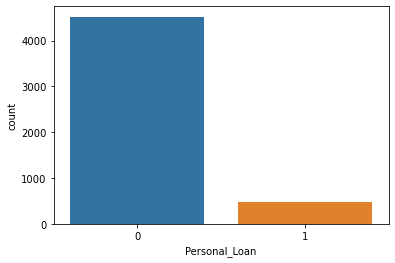

In [10]:
import seaborn as sns
sns.countplot(df.Personal_Loan)

In [11]:
df.drop('ID',axis=1,inplace=True)

In [12]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

# Age

In [13]:
df.Age.value_counts()

35    151
43    149
52    145
54    143
58    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
45    127
60    127
46    127
42    126
31    125
40    125
55    125
29    123
62    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
67     12
23     12
Name: Age, dtype: int64

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod=ols('Personal_Loan~Age',data=df).fit()
anov=sm.stats.anova_lm(mod)
print(anov)

              df      sum_sq   mean_sq         F    PR(>F)
Age          1.0    0.025899  0.025899  0.298324  0.584959
Residual  4998.0  433.894101  0.086814       NaN       NaN


In [15]:
df.drop('Age',axis=1,inplace=True)

In [16]:
df.columns

Index(['Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard'],
      dtype='object')

# Experience

In [17]:
df.Experience.value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

C:\Users\Siddiq\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Experience', ylabel='Density'>

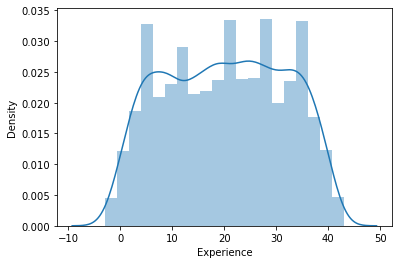

In [18]:
sns.distplot(df.Experience)

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod=ols('Personal_Loan~Experience',data=df).fit()
anov=sm.stats.anova_lm(mod)
print(anov)

                df      sum_sq   mean_sq         F    PR(>F)
Experience     1.0    0.023846  0.023846  0.274675  0.600236
Residual    4998.0  433.896154  0.086814       NaN       NaN


In [20]:
df.drop('Experience',inplace=True,axis=1)

In [21]:
df.columns

Index(['Income', 'ZIP_Code', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online',
       'CreditCard'],
      dtype='object')

# Income

In [22]:
df.Income.value_counts()

44     85
38     84
81     83
41     82
39     81
40     78
42     77
83     74
43     70
45     69
29     67
35     65
21     65
85     65
22     65
25     64
84     63
28     63
30     63
78     61
82     61
55     61
65     60
64     60
32     58
53     57
61     57
80     56
58     55
31     55
62     55
23     54
18     53
34     53
79     53
59     53
19     52
54     52
49     52
60     52
33     51
70     47
52     47
75     47
20     47
24     47
63     46
69     46
74     45
50     45
73     44
48     44
71     43
72     41
51     41
90     38
93     37
91     37
68     35
113    34
89     34
15     33
13     32
14     31
114    30
12     30
92     29
98     28
11     27
115    27
9      26
112    26
88     26
94     26
95     25
122    24
101    24
141    24
99     24
128    24
129    23
145    23
8      23
125    23
10     23
111    22
154    21
134    20
104    20
121    20
149    20
105    20
130    19
110    19
118    19
155    19
131    19
140    19
103    18
180    18


C:\Users\Siddiq\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

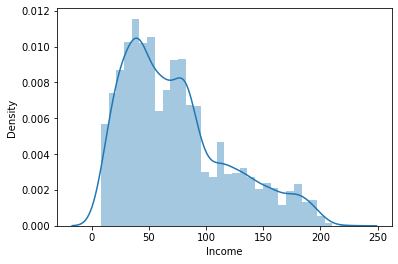

In [23]:
sns.distplot(df.Income)

In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod=ols('Personal_Loan~Income',data=df).fit()
anov=sm.stats.anova_lm(mod)
print(anov)

              df      sum_sq     mean_sq           F         PR(>F)
Income       1.0  109.551069  109.551069  1688.00458  3.560291e-318
Residual  4998.0  324.368931    0.064900         NaN            NaN


In [25]:
df.columns

Index(['Income', 'ZIP_Code', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online',
       'CreditCard'],
      dtype='object')

# ZIP_Code

In [26]:
df.ZIP_Code.value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
93943     54
92037     54
91320     53
91711     52
94025     52
92093     51
90024     50
90245     50
90089     46
91330     46
92121     45
94304     45
94143     37
95051     34
94608     34
92182     32
92028     32
92521     32
95054     31
95814     30
95014     29
94542     27
94550     27
94301     27
95064     26
94501     26
95039     26
95819     26
93407     26
94105     25
91107     25
94022     25
95060     25
94303     25
93117     24
94596     24
93555     23
94080     23
95521     23
91380     22
92612     22
92717     22
92647     21
94110     21
91768     21
94117     20
94132     20
90034     20
90401     20
94005     19
90266     19
92122     19
92697     19
90025     19
95747     19
90840     18
94709     18
94309     18
92130     18
90291     18
93940     18
94122     18
93023     17
90630     17
92009     17
94583     17
92691     17
90740     17
92407     17
91311     17
92120     17
92096     17

C:\Users\Siddiq\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ZIP_Code', ylabel='Density'>

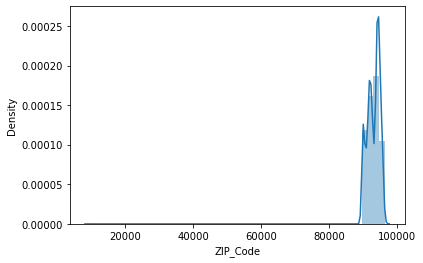

In [27]:
sns.distplot(df.ZIP_Code)

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod=ols('Personal_Loan~ZIP_Code',data=df).fit()
anov=sm.stats.anova_lm(mod)
print(anov)

              df      sum_sq   mean_sq         F    PR(>F)
ZIP_Code     1.0    0.000005  0.000005  0.000058  0.993944
Residual  4998.0  433.919995  0.086819       NaN       NaN


In [29]:
df.drop('ZIP_Code',axis=1,inplace=True)

In [30]:
df.columns

Index(['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal_Loan',
       'Securities_Account', 'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

# Family

In [31]:
df.Family.value_counts()#ordered

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

C:\Users\Siddiq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Family', ylabel='count'>

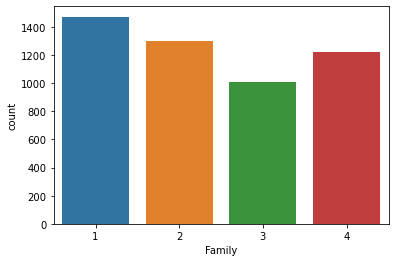

In [32]:
sns.countplot(df.Family)

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod=ols('Personal_Loan~Family',data=df).fit()
anov=sm.stats.anova_lm(mod)
print(anov)

              df      sum_sq   mean_sq          F    PR(>F)
Family       1.0    1.634105  1.634105  18.893189  0.000014
Residual  4998.0  432.285895  0.086492        NaN       NaN


In [34]:
df.columns

Index(['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal_Loan',
       'Securities_Account', 'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

# CCAvg

In [35]:
df.CCAvg.value_counts()

0.30     241
1.00     231
0.20     204
2.00     188
0.80     187
0.10     183
0.40     179
1.50     178
0.70     169
0.50     163
1.70     158
1.80     152
1.40     136
2.20     130
1.30     128
0.60     118
2.80     110
2.50     107
0.90     106
0.00     106
1.90     106
1.60     101
2.10     100
2.40      92
2.60      87
1.10      84
1.20      66
2.30      58
2.70      58
2.90      54
3.00      53
3.30      45
3.80      43
3.40      39
2.67      36
4.00      33
4.50      29
3.60      27
3.90      27
4.30      26
6.00      26
3.70      25
4.70      24
4.10      22
4.90      22
3.20      22
3.10      20
2.33      18
1.67      18
5.40      18
0.67      18
5.00      18
6.50      18
4.40      17
5.20      16
3.50      15
4.60      14
6.10      14
6.90      14
7.00      14
7.20      13
7.40      13
5.70      13
6.30      13
8.00      12
7.50      12
4.20      11
8.10      10
6.80      10
7.30      10
6.33      10
8.80       9
1.33       9
7.60       9
6.70       9
6.67       9
7.80       9

C:\Users\Siddiq\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

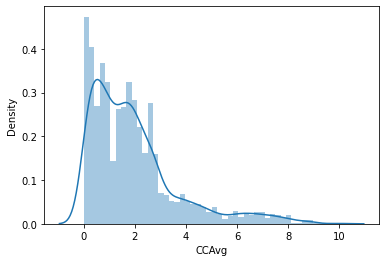

In [36]:
sns.distplot(df.CCAvg)

In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod=ols('Personal_Loan~CCAvg',data=df).fit()
anov=sm.stats.anova_lm(mod)
print(anov)

              df      sum_sq    mean_sq           F         PR(>F)
CCAvg        1.0   58.408819  58.408819  777.413007  3.830266e-159
Residual  4998.0  375.511181   0.075132         NaN            NaN


In [38]:
df.columns

Index(['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal_Loan',
       'Securities_Account', 'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

# Education

In [39]:
df.Education.value_counts()#ordered

1    2096
3    1501
2    1403
Name: Education, dtype: int64

C:\Users\Siddiq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

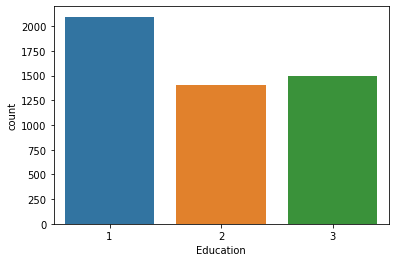

In [40]:
sns.countplot(df.Education)

In [41]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod=ols('Personal_Loan~Education',data=df).fit()
anov=sm.stats.anova_lm(mod)
print(anov)

               df      sum_sq   mean_sq          F        PR(>F)
Education     1.0    8.111172  8.111172  95.206194  2.709663e-22
Residual   4998.0  425.808828  0.085196        NaN           NaN


In [42]:
df.columns

Index(['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal_Loan',
       'Securities_Account', 'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

# Mortgage

In [43]:
df.Mortgage.value_counts()

0      3462
98       17
119      16
89       16
91       16
103      16
83       16
102      15
90       15
78       15
87       14
94       14
131      14
118      14
104      14
101      14
144      13
106      13
81       13
116      13
109      13
112      13
97       12
120      12
100      12
76       12
185      12
121      12
84       11
137      11
79       11
115      11
153      11
95       11
86       11
111      11
158      11
184      11
113      10
108      10
142      10
117      10
82       10
151      10
161      10
135      10
148       9
149       9
166       9
88        9
221       9
146       9
123       9
167       9
128       9
159       9
138       8
205       8
147       8
174       8
218       8
122       8
75        8
140       8
170       8
194       8
110       8
114       8
169       8
157       8
164       8
105       8
207       8
132       8
96        7
127       7
124       7
229       7
204       7
230       7
85        7
249       7
219       7
80  

C:\Users\Siddiq\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mortgage', ylabel='Density'>

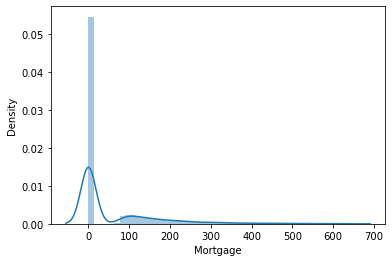

In [44]:
sns.distplot(df.Mortgage)

In [45]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod=ols('Personal_Loan~Mortgage',data=df).fit()
anov=sm.stats.anova_lm(mod)
print(anov)

              df      sum_sq   mean_sq           F        PR(>F)
Mortgage     1.0    8.761303  8.761303  102.994466  5.730342e-24
Residual  4998.0  425.158697  0.085066         NaN           NaN


In [46]:
df.columns

Index(['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal_Loan',
       'Securities_Account', 'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

# Securities_Account

In [47]:
df.Securities_Account.value_counts()

0    4478
1     522
Name: Securities_Account, dtype: int64

C:\Users\Siddiq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Securities_Account', ylabel='count'>

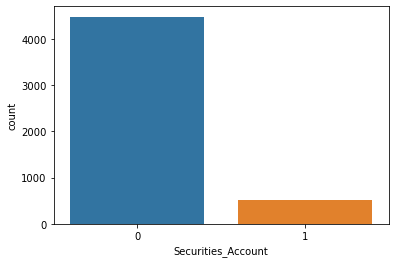

In [48]:
sns.countplot(df.Securities_Account)

In [49]:
from scipy.stats import chi2_contingency
comp=pd.crosstab(df.Personal_Loan,df.Securities_Account)
chi2_contingency(comp,correction=False)

(2.4098647218383684,
 0.12057278505742522,
 1,
 array([[4048.112,  471.888],
        [ 429.888,   50.112]]))

In [50]:
df.drop('Securities_Account',axis=1,inplace=True)

In [51]:
df.columns

Index(['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal_Loan',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

# CD_Account

In [52]:
df.CD_Account.value_counts()

0    4698
1     302
Name: CD_Account, dtype: int64

C:\Users\Siddiq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CD_Account', ylabel='count'>

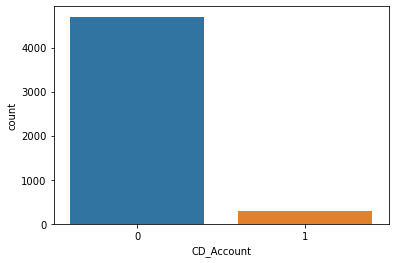

In [53]:
sns.countplot(df.CD_Account)

In [54]:
from scipy.stats import chi2_contingency
comp=pd.crosstab(df.Personal_Loan,df.CD_Account)
chi2_contingency(comp,correction=False)

(500.40189046908114,
 7.771898331676633e-111,
 1,
 array([[4246.992,  273.008],
        [ 451.008,   28.992]]))

# Online

In [55]:
df.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

C:\Users\Siddiq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Online', ylabel='count'>

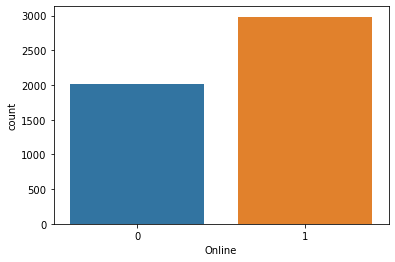

In [56]:
sns.countplot(df.Online)

In [57]:
from scipy.stats import chi2_contingency
comp=pd.crosstab(df.Personal_Loan,df.Online)
chi2_contingency(comp,correction=False)

(0.197054830778904,
 0.6571086782806848,
 1,
 array([[1822.464, 2697.536],
        [ 193.536,  286.464]]))

In [58]:
df.drop('Online',axis=1,inplace=True)

In [59]:
df.columns

Index(['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal_Loan',
       'CD_Account', 'CreditCard'],
      dtype='object')

# CreditCard

In [60]:
df.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

C:\Users\Siddiq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditCard', ylabel='count'>

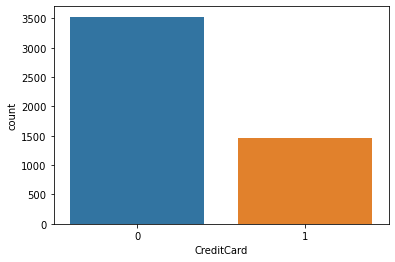

In [61]:
sns.countplot(df.CreditCard)

In [62]:
from scipy.stats import chi2_contingency
comp=pd.crosstab(df.Personal_Loan,df.CreditCard)
chi2_contingency(comp,correction=False)

(0.039242258946581565,
 0.8429694927995713,
 1,
 array([[3191.12, 1328.88],
        [ 338.88,  141.12]]))

In [63]:
df.drop('CreditCard',axis=1,inplace=True)

# model

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Income         5000 non-null   int64  
 1   Family         5000 non-null   int64  
 2   CCAvg          5000 non-null   float64
 3   Education      5000 non-null   int64  
 4   Mortgage       5000 non-null   int64  
 5   Personal_Loan  5000 non-null   int64  
 6   CD_Account     5000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 273.6 KB


In [66]:
x=df.iloc[:,[0,1,2,3,4]]

In [67]:
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i)
                for i in range(len(x.columns))]
print(vif_data)

     feature       VIF
0     Income  5.344242
1     Family  3.666258
2      CCAvg  3.824800
3  Education  3.722871
4   Mortgage  1.365445


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Income         5000 non-null   int64  
 1   Family         5000 non-null   int64  
 2   CCAvg          5000 non-null   float64
 3   Education      5000 non-null   int64  
 4   Mortgage       5000 non-null   int64  
 5   Personal_Loan  5000 non-null   int64  
 6   CD_Account     5000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 273.6 KB


In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
x=df.loc[:,df.columns!='Personal_Loan']
y=df.loc[:,df.columns=='Personal_Loan']

In [71]:
model1=LogisticRegression(solver='liblinear',random_state=0)
model1.fit(x,y)
model1.intercept_
model1.coef_

C:\Users\Siddiq\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[4.43204166e-02, 4.92516340e-01, 9.23465930e-02, 1.28209827e+00,
        4.37966212e-04, 2.10793244e+00]])

In [72]:
y_pred=model1.predict(x)

In [73]:
from sklearn import metrics
cm=metrics.confusion_matrix(y,y_pred)
print(cm)

[[4461   59]
 [ 206  274]]


In [74]:
model1.score(x,y)

0.947

In [75]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4520
           1       0.82      0.57      0.67       480

    accuracy                           0.95      5000
   macro avg       0.89      0.78      0.82      5000
weighted avg       0.94      0.95      0.94      5000



In [77]:
from sklearn.metrics import roc_curve,auc,roc_auc_score

In [78]:
y_pred_prob=model1.predict_proba(x)
fpr,tpr,thresholds=roc_curve(df['Personal_Loan'],y_pred_prob[:,1])
roc_auc=auc(fpr,tpr)
print(roc_auc)

0.9567468657817109


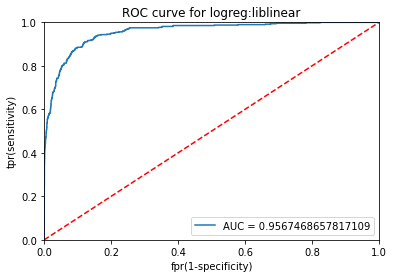

In [79]:
import matplotlib.pyplot as plt
plt.title('ROC curve for logreg:liblinear')
plt.xlabel('fpr(1-specificity)')
plt.ylabel('tpr(sensitivity)')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr,tpr,label='AUC = '+str(roc_auc))
plt.legend(loc=4)
plt.show()

# Smote

In [80]:
df.Personal_Loan.value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [81]:
nolon=df[df.Personal_Loan==0]
lon=df[df.Personal_Loan==1]

In [82]:
from sklearn.utils import resample

In [83]:
lon_oversample=resample(lon,replace=True,n_samples=len(nolon),random_state=27)

In [84]:
dfsmote=pd.concat([nolon,lon_oversample])
dfsmote.Personal_Loan.value_counts()

0    4520
1    4520
Name: Personal_Loan, dtype: int64

In [85]:
x2=dfsmote.loc[:,dfsmote.columns!='Personal_Loan']
y2=dfsmote.loc[:,dfsmote.columns=='Personal_Loan']
y2.value_counts()

Personal_Loan
0                4520
1                4520
dtype: int64

In [86]:
model2=LogisticRegression(solver='liblinear',random_state=0)
model2.fit(x2,y2)

C:\Users\Siddiq\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0, solver='liblinear')

In [87]:
model2.intercept_


array([-9.79794804])

In [88]:
model2.coef_

array([[4.98359934e-02, 5.39707741e-01, 2.06739584e-01, 1.14159357e+00,
        2.74034714e-04, 2.47130671e+00]])

In [89]:
y_pred2=model2.predict(x2)

In [90]:
from sklearn import metrics
cm2=metrics.confusion_matrix(y2,y_pred2)
print(cm2)

[[4018  502]
 [ 433 4087]]


In [91]:
model2.score(x2,y2)

0.896570796460177

In [92]:
print(classification_report(y2,y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      4520
           1       0.89      0.90      0.90      4520

    accuracy                           0.90      9040
   macro avg       0.90      0.90      0.90      9040
weighted avg       0.90      0.90      0.90      9040



In [93]:
y_pred_prob2=model2.predict_proba(x2)
fpr2,tpr2,thresholds2=roc_curve(dfsmote['Personal_Loan'],y_pred_prob2[:,1])
roc_auc2=auc(fpr2,tpr2)
print(roc_auc2)

0.9555684665987939


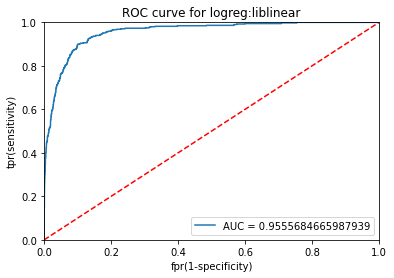

In [94]:
plt.title('ROC curve for logreg:liblinear')
plt.xlabel('fpr(1-specificity)')
plt.ylabel('tpr(sensitivity)')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr2,tpr2,label='AUC = '+str(roc_auc2))
plt.legend(loc=4)
plt.show()

# Decision Tree

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.2, random_state=42)

In [97]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=40)
tree.fit(x_train,y_train)
y_train_pred=tree.predict(x_train)
y_test_pred=tree.predict(x_test)

In [98]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_train,y_train_pred),2))
print(round(accuracy_score(y_test,y_test_pred),2))

1.0
0.99


In [99]:
depth=[1,2,3,4,5,6,7,8,9]
accuracy_train,accuracy_test=[],[]
for i in depth:
    tree=DecisionTreeClassifier(max_depth=i)
    tree.fit(x_train,y_train)
    y_train_pred1=tree.predict(x_train)
    y_test_pred1=tree.predict(x_test)
    accuracy_train.append(accuracy_score(y_train,y_train_pred1))
    accuracy_test.append(accuracy_score(y_test,y_test_pred1))

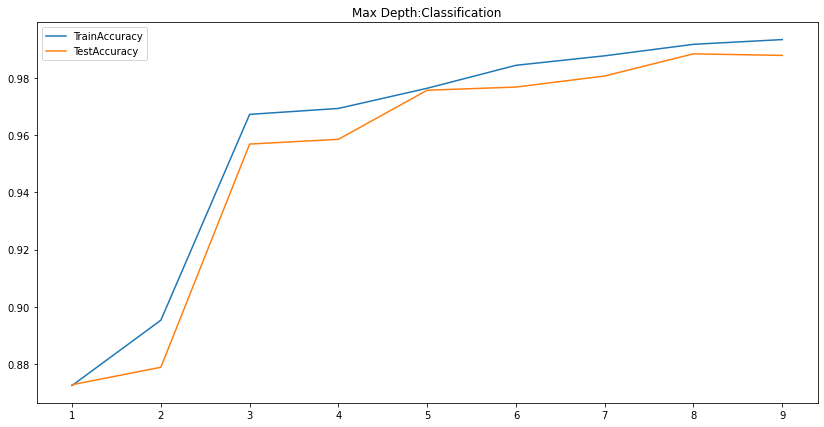

In [100]:
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=depth,label='TrainAccuracy')
sns.lineplot(y=accuracy_test,x=depth,label='TestAccuracy')
plt.title('Max Depth:Classification')
plt.show()